<a href="https://colab.research.google.com/github/KShrey00/Handwritten_Digit-Recognition_CNN_model/blob/main/handwritten_digit_recognition_CNN_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow scikit-learn matplotlib seaborn numpy

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import zipfile

zip_path = '<add your zip file>' # path to your zip file
unzipped_path = '<add your directory>' # Directory to unzip the contents

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzipped_path)

print(f"Unzipped data to: {unzipped_path}")
img_size = (28, 28)

Unzipped data to: /content/NIST SD1_digits


In [6]:
# === Data Preparation ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Update unzipped_path to point to the correct subdirectory
correct_unzipped_path = os.path.join(unzipped_path, 'NIST SD1_digits')

train_gen = datagen.flow_from_directory(
    correct_unzipped_path,
    target_size=img_size,
    color_mode="grayscale",
    class_mode="sparse",
    batch_size=32,
    subset="training"
)

val_gen = datagen.flow_from_directory(
    correct_unzipped_path,
    target_size=img_size,
    color_mode="grayscale",
    class_mode="sparse",
    batch_size=32,
    subset="validation",
    shuffle=False
)

Found 42764 images belonging to 10 classes.
Found 10685 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1336/1337 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7052 - loss: 0.8769

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1337/1337 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.7055 - loss: 0.8763 - val_accuracy: 0.9545 - val_loss: 0.1546
Epoch 2/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9502 - loss: 0.1594 - val_accuracy: 0.9678 - val_loss: 0.1010
Epoch 3/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9648 - loss: 0.1107 - val_accuracy: 0.9748 - val_loss: 0.0846
Epoch 4/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9729 - loss: 0.0906 - val_accuracy: 0.9745 - val_loss: 0.0889
Epoch 5/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9751 - loss: 0.0748 - val_accuracy: 0.9782 - val_loss: 0.0736
Epoch 6/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9804 - loss: 0.0632 - val_accuracy: 0.9771 - val_loss: 0.0778
Epoch 7/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.9829 - loss: 0.0538 - val_accuracy: 0.9795 - val_loss: 0.0712
Epoch 8/10
1337/1337 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9846 - loss: 0.04

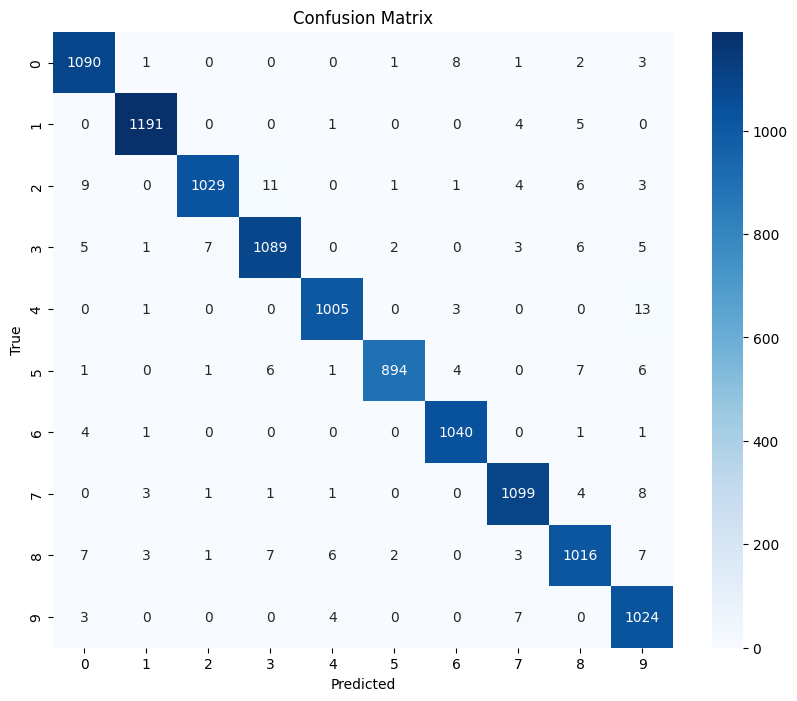

In [7]:

# === CNN Model ===
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# === Training ===
model.fit(train_gen, epochs=10, validation_data=val_gen)

# === Evaluation ===
val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


You can save your trained model for future use. This will save the model's architecture, weights, and optimizer state.

In [8]:
# === Save the Model ===
model_save_path = "/content/digit_classifier_model.keras" # Using the recommended .keras format
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: /content/digit_classifier_model.keras
